## Map Sample IDs to Sample Labels

In [2]:

def Gen_SourcePlateMetadata(HostCellType):
    SampleIDtoDescription= dict();
    SampleIDtoVec=dict();
    Inf = np.Inf;
    

    
    for i in [1,2]:
        SampleIDtoDescription[i] = 'DMSO Control all events'; 

    for i in [3,4]:
        SampleIDtoDescription[i] = 'QS-,TSS-'; 
    
        
    for i in [5,6,7,8]:
        SampleIDtoDescription[i] = 'T3SS+,QS+'; 

    for i in [9]:
        SampleIDtoDescription[i] = 'Gacid-,DOFB-'; 

    for i in [10]:
        SampleIDtoDescription[i] = 'Neu-,Cwp8-'; 
    for i in [11,12,13,14,23]:
        SampleIDtoDescription[i] = 'Neu+,Cwp8+'; 

    for i in [15,16,17]:
        SampleIDtoDescription[i] = 'C5a-,Cur-'; 


    for i in [18,19]:
        SampleIDtoDescription[i] = 'T3SS+,QS+'; 

    for i in [20,21,22]:
        SampleIDtoDescription[i] = 'Gacid+'; 

    for i in [24,25]:
        SampleIDtoDescription[i] = 'FimH-,Qsec-'; 

        
    SampleSourceCond = dict();
    print(HostCellType)
      #= SourcePlate[1] + ColPatternSPlate1thr12[6];
    if HostCellType=='A549ERKFRA1':
        SampleIDtoDescription[26] = '100CFU PA01';
        SampleIDtoDescription[27] = 'LB';
        SampleIDtoDescription[28] = 'S. flexneri';
        SampleIDtoDescription[29] = '100CFU S. epidermis';
        SampleIDtoDescription[30] = 'BHI';
        SampleIDtoDescription[31] = 'L. grayi';
    if HostCellType=='HCT116ERKFRA1_HCT116':
        SampleIDtoDescription[26] = '100CFU PA01';
        SampleIDtoDescription[27] = 'LB';
        SampleIDtoDescription[28] = 'S. flexneri';
        SampleIDtoDescription[29] = '100CFU S. epidermis';
        SampleIDtoDescription[30] = 'BHI';
        SampleIDtoDescription[31] = 'L. grayi';
    for SampleIndex in list(range(1,32)):# 91 samples only. 
        SampleSourceCond[SampleIndex] = 'S'+repr(SampleIndex)+'_'+SampleIDtoDescription[SampleIndex];
   
    return SampleSourceCond,SampleIDtoDescription,SampleIDtoVec;



def GenDataFrame(ThisDestPlateNum):
    PlateLayoutofSampleIndex = np.zeros((8,12));
    if ThisDestPlateNum==1:
        PlateLayoutofSampleIndex[0,0:4] = 1;  
        PlateLayoutofSampleIndex[0,4:8] = 2;  
        PlateLayoutofSampleIndex[0,8:12] = 3;  
        
        PlateLayoutofSampleIndex[1,0:4] = 4;  
        PlateLayoutofSampleIndex[1,4:8] = 5;  
        PlateLayoutofSampleIndex[1,8:12] = 6;  

        PlateLayoutofSampleIndex[2,0:4] = 7;  
        PlateLayoutofSampleIndex[2,4:8] = 8;  
        PlateLayoutofSampleIndex[2,8:12] = 9;  

        PlateLayoutofSampleIndex[3,0:4] = 10;  
        PlateLayoutofSampleIndex[3,4:8] = 11;  
        PlateLayoutofSampleIndex[3,8:12] = 12;  

        PlateLayoutofSampleIndex[4,0:4] = 13;  
        PlateLayoutofSampleIndex[4,4:8] = 14;  
        PlateLayoutofSampleIndex[4,8:12] = 15;  

        PlateLayoutofSampleIndex[5,0:4] =16;  
        PlateLayoutofSampleIndex[5,4:8] = 17;  
        PlateLayoutofSampleIndex[5,8:12] = 18;  

        PlateLayoutofSampleIndex[6,0:4] =19;  
        PlateLayoutofSampleIndex[6,4:8] = 20;  
        PlateLayoutofSampleIndex[6,8:12] = 21;  

        PlateLayoutofSampleIndex[7,0:4] = 22;  
        PlateLayoutofSampleIndex[7,4:8] = 23;  
        PlateLayoutofSampleIndex[7,8:12] = 24;  


    if ThisDestPlateNum==2:
        PlateLayoutofSampleIndex[0,0:4] = 25;  


    if ThisDestPlateNum==3:
        PlateLayoutofSampleIndex[0,0:4] = 26;  
        PlateLayoutofSampleIndex[0,4:8] = 27;  
        PlateLayoutofSampleIndex[0,8:12] = 28;  
        
        PlateLayoutofSampleIndex[1,0:4] = 29;  
        PlateLayoutofSampleIndex[1,4:8] = 30;  
        PlateLayoutofSampleIndex[1,8:12] = 31;  

        

    DestPlateCol = ['+PMBC','+PMBC','+PMBC','+PMBC','+PMBC','+PMBC','+PMBC','+PMBC','+PMBC','+PMBC','+PMBC','+PMBC'];
    return PlateLayoutofSampleIndex,DestPlateCol; 


## Load Pickle File of Standard Reference Curves

In [3]:
import pickle
StandardCurve_File = open('/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/StandardCurvesTwo.pickle','rb');
ReferenceCurveDictv2 = pickle.load(StandardCurve_File)[0];
StandardCurve_File.close()

## Load Pickle File from CbC Analysis 

In [16]:
import pickle
import os; 
import numpy as np;
import numpy as np
import matplotlib.pyplot as plt 




PlateNum = '1';
#HostCellLineType = 'A549ERKFRA1'
HostCellLineType = 'HCT116ERKFRA1_HCT116'; 

import warnings
warnings.filterwarnings("ignore")

if HostCellLineType=='A549ERKFRA1':
    kernel_names = ['hA549','uha549','bp'];
    Formal_Kernel_Names = ['Healthy A549','Unhealthy A549','Bacterial Patch']
    Select_Kernels = [0,1,2]; 
    list_of_colors = ['g','r','b'] 
if HostCellLineType=='HCT116ERKFRA1_HCT116':
    kernel_names = ['hHCT116','bp'];
    Formal_Kernel_Names = ['Healthy HCT116','Bacterial Patch']
    Select_Kernels=[0,2];
    list_of_colors = ['g','b'] 

SampleSourceCondDict,SampleID2Description,SampleID2Vec = Gen_SourcePlateMetadata(HostCellLineType);
PlateLayoutofSampleIndices,DestPlateCols = GenDataFrame(np.int(PlateNum))
   
PolyOrd = 1;  # 7 for initial analysis , change back to 7. . . 


Pickle_Path = '/Users/enochyeung/Box/DARPAFoF UCSB Team Share/Repr_Pickles/Repr_Pickles/';
File_Path = Pickle_Path+'/ERDCAnalysisv1/' +'P'+PlateNum +'_' +HostCellLineType +'.pickle';
output_file = open(File_Path,'rb')
feature_dict = pickle.load(output_file);
output_file.close()



HCT116ERKFRA1_HCT116


## Visualize Machine-Learning Extracted Pathogenicity Features

In [17]:
## Define Reference Normalization Values

if HostCellLineType == 'A549ERKFRA1':
    MaxValueKernel1 = 25.0;
    MaxValueKernel2 = 20.0;
    Select_Kernels = [0,1,2,];
if HostCellLineType == 'HCT116ERKFRA1_HCT116':
    MaxValueKernel1 = 10.0;
    MaxValueKernel2 = 1.0;
    Select_Kernels=[0,1];

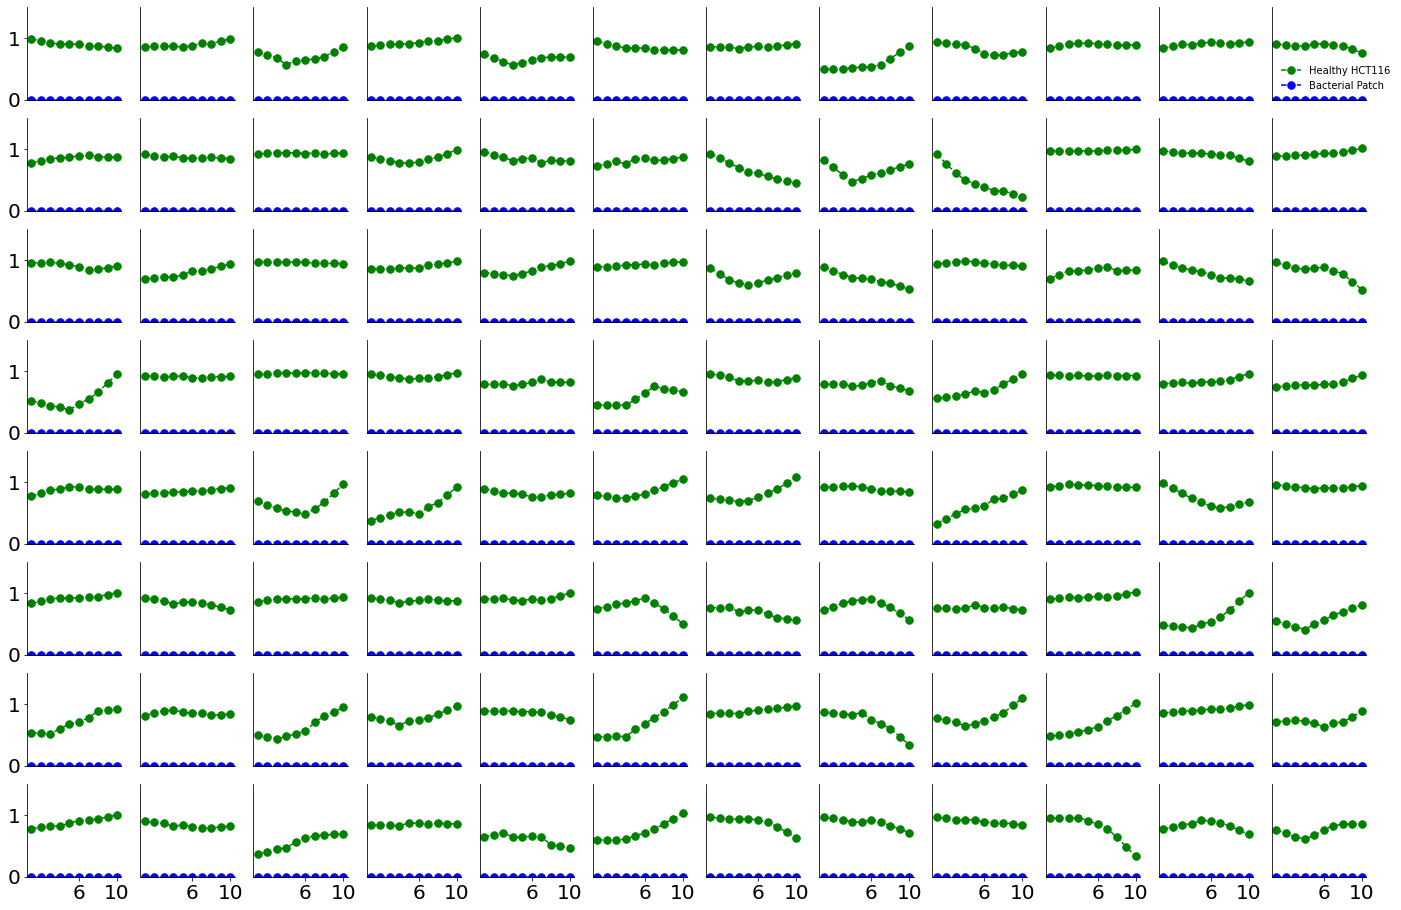

In [18]:

import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
from scipy.signal import savgol_filter


all_row_ind = ['A','B','C','D','E','F','G','H']
all_col_ind = ['1','2','3','4','5','6','7','8','9','10','11','12']

plt.figure(figsize=(24,16))
for row_ind in range(0,len(all_row_ind)):
    for col_ind in range(0,len(all_col_ind)):
        this_well = all_row_ind[row_ind] + all_col_ind[col_ind];
        time_keys = list(feature_dict[this_well].keys());
        time_keys.sort()
        time_keys = time_keys[0:10]
        for kernel_ind in Select_Kernels:
            kernel =  kernel_names[kernel_ind];
            if kernel_ind==2:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                ys = [np.max([elem-ys[0],0])/MaxValueKernel2 for elem in ys]
            if kernel_ind==0:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                ys = [elem/np.max(ys) for elem in ys];
            if kernel_ind ==1:
                ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                ys = [elem  for elem in ys];
                ys = [np.max([elem-ys[0],0])/MaxValueKernel1 for elem in ys]
                ys = ys
            times = [float(int(elem)*60.0/60.0) for elem in time_keys]
            subax = plt.subplot(len(all_row_ind),len(all_col_ind),len(all_col_ind)*(row_ind)+(col_ind+1),frameon=True,fc='white')
            
            ys = savgol_filter(ys, 5, PolyOrd) # window size 5, polynomial order 1

            subax.plot(times,ys,'.--',ms=15,color=list_of_colors[kernel_ind])
            plt.ylim([0,1.5])

        subax.spines['right'].set_visible(False)
        subax.spines['top'].set_visible(False)   

        if (row_ind)==7:
            subax.get_xaxis().set_ticks([np.round(elem,2) for elem in (np.linspace(times[np.int(len(times)/2)], times[-1],num=2))])
        else:
            subax.get_xaxis().set_ticks([])
        if not (col_ind ==0):
            subax.get_yaxis().set_ticks([])
        if row_ind==0 and col_ind==11:
            plt.legend([Formal_Kernel_Names[elem] for elem in Select_Kernels],fontsize=10,frameon=False)


## Compute L2 Scores Tensor (Rows x Cols x Kernel Type) 

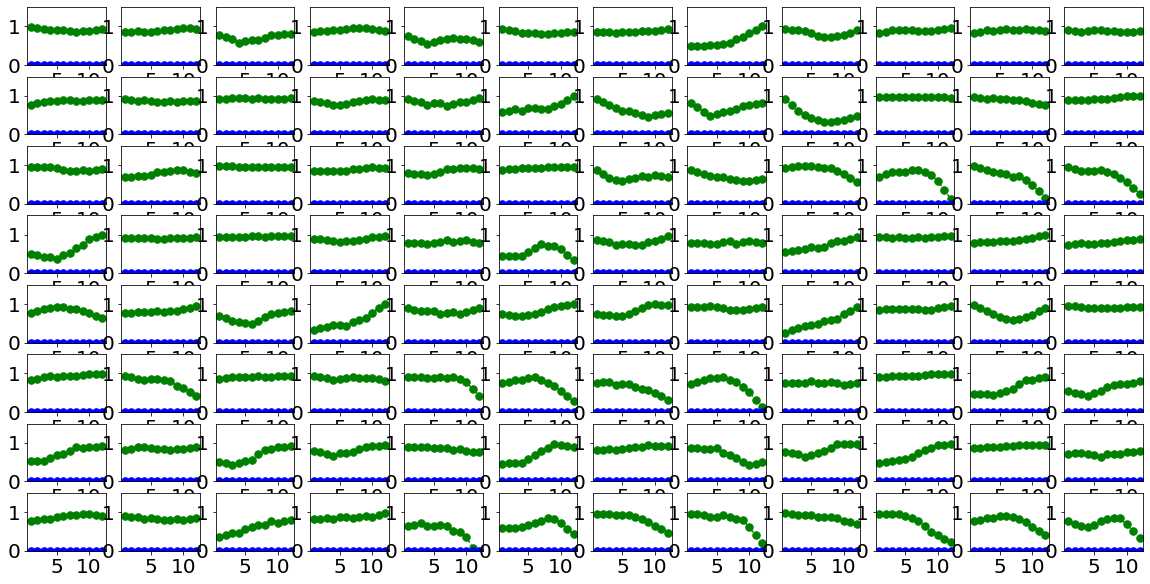

In [19]:

Max_Time_Ind = 12; 


PlateScores = np.zeros((8,12,3))
PlateCurves = np.zeros((8,12,3,Max_Time_Ind));

plt.figure(figsize=(20,10))

for row_ind in range(0,len(all_row_ind)):
    for col_ind in range(0,len(all_col_ind)):
            this_well = all_row_ind[row_ind] + all_col_ind[col_ind];
            time_keys = list(feature_dict[this_well].keys());
            time_keys.sort()
            time_keys = time_keys[0:Max_Time_Ind]
            for kernel_ind in Select_Kernels:
                kernel =  kernel_names[kernel_ind];
                if kernel_ind==2:
                    ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                    ys = [np.max([elem-ys[0],0])/MaxValueKernel2 for elem in ys]
                if kernel_ind==0:
                    ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                    ys = [elem/np.max(ys) for elem in ys];
                if kernel_ind ==1:
                    ys = [feature_dict[this_well][elem][kernel] for elem in time_keys]
                    ys = [elem  for elem in ys];
                    ys = [np.max([elem-ys[0],0])/MaxValueKernel1 for elem in ys]
                    ys = ys
                times = [float(int(elem)*60.0/60.0) for elem in time_keys]
                subax = plt.subplot(len(all_row_ind),len(all_col_ind),len(all_col_ind)*(row_ind)+(col_ind+1),frameon=True,fc='white')

                ys = savgol_filter(ys, 5, polyorder=PolyOrd) # window size 51, polynomial order 3

                subax.plot(times,ys,'.--',ms=15,color=list_of_colors[kernel_ind])
                plt.ylim([0,1.5])
            
                PlateCurves[row_ind,col_ind,kernel_ind,0:Max_Time_Ind]= np.array(ys);
            
for this_kernel_ind in Select_Kernels:
    Reference_Curve = ReferenceCurveDictv2[HostCellLineType][this_kernel_ind]#np.mean(PlateCurves[7,4:8,this_kernel_ind,0:Max_Time_Ind],axis=0)
    for row_ind in range(0,len(all_row_ind)):
        for col_ind in range(0,len(all_col_ind)):
            if this_kernel_ind == 0 : 
                PlateScores[row_ind,col_ind,this_kernel_ind]= np.sum(Reference_Curve - PlateCurves[row_ind,col_ind,this_kernel_ind,0:Max_Time_Ind])
            if this_kernel_ind == 1 or this_kernel_ind==2: 
                PlateScores[row_ind,col_ind,this_kernel_ind]= np.sum(PlateCurves[row_ind,col_ind,this_kernel_ind,0:Max_Time_Ind]-Reference_Curve)

### Plot Heatmaps of Scores For Each Feature

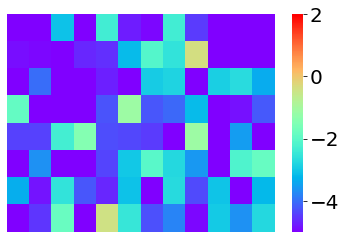

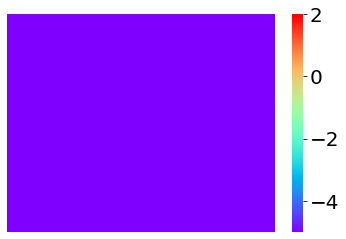

In [20]:
import seaborn as sns
for this_kernel_ind in Select_Kernels:
    plt.figure()
    sns.heatmap(PlateScores[:,:,this_kernel_ind],cmap='rainbow',vmin=-5,vmax=2.0)
    plt.xticks([]);
    plt.yticks([])

## Generate Headers of Score Table

In [22]:
ServetasTable=[];

## Generate all sort condition tags.
all_sort_conds = [];
for value in SampleSourceCondDict.values():
    These_Values = value.split('_')[-1].split(',')
    for value in These_Values:
        all_sort_conds.append(value) 
all_sort_conds = list(set(all_sort_conds));



Headers = ['Isolate ID']#
AssayTypetoColIndex= dict(); 
ColCounter = 0;
for this_kernel_ind in Select_Kernels:
     
        if 'Healthy ' in Formal_Kernel_Names[this_kernel_ind] :
            AssayType = HostCellLineType+' Confluence Disruption Score'
            AssayTypetoColIndex[AssayType] =1

        if HostCellLineType=='A549ERKFRA1':
            if 'Unhealthy' in Formal_Kernel_Names[this_kernel_ind] :
                AssayType = HostCellLineType+' Cytotoxicity Score'
                AssayTypetoColIndex[AssayType] = 2;
            if 'bacterial' in Formal_Kernel_Names[this_kernel_ind].lower() :
                AssayType = HostCellLineType+' Immune Evasion Score'
                AssayTypetoColIndex[AssayType] = 3;
        
                
        else:                
            if 'bacterial' in Formal_Kernel_Names[this_kernel_ind].lower() :
                AssayType = HostCellLineType+' Immune Evasion Score'
                AssayTypetoColIndex[AssayType] = 2;
        
        
for elem in list(AssayTypetoColIndex.keys()):
    Headers.append(elem);
            
ServetasTable.append(Headers+all_sort_conds);

## Populate rows of score table, score each sorted sample

In [23]:
for row_ind in range(0,len(all_row_ind)):
    for col_ind in [0,4,8]: 
        ServetasRow = [None]*len(Headers);
        for this_kernel_ind in Select_Kernels:
            ThisSampleFullSpec = SampleSourceCondDict[PlateLayoutofSampleIndices[row_ind,col_ind]];
            SortTags = ThisSampleFullSpec.split('_')[-1].split(',')
            BooleanState = np.zeros((1,len(all_sort_conds)))
            for ThisSortTag in SortTags:
                if ThisSortTag in all_sort_conds:
                    BooleanState[0,all_sort_conds.index(ThisSortTag)]=1.0;

            ServetasRow[0] = ThisSampleFullSpec; 
                        
            ThisScore=np.mean(PlateScores[row_ind,col_ind:col_ind+4,this_kernel_ind])
            AssayType = None;
            if 'Healthy ' in Formal_Kernel_Names[this_kernel_ind]:
                AssayType = HostCellLineType+' Confluence Disruption Score'

            if HostCellLineType=='A549ERKFRA1':
                if 'Unhealthy' in Formal_Kernel_Names[this_kernel_ind]:
                    AssayType = HostCellLineType+' Cytotoxicity Score'
                if 'bacterial' in Formal_Kernel_Names[this_kernel_ind].lower():
                    AssayType = HostCellLineType+' Immune Evasion Score'    
            else:
                if 'bacterial' in Formal_Kernel_Names[this_kernel_ind].lower():
                    AssayType = HostCellLineType+' Immune Evasion Score'

            ServetasColIndex = AssayTypetoColIndex[AssayType]
            ServetasRow[ServetasColIndex] = ThisScore;

        BooleanState = list(np.ndarray.flatten(BooleanState))
        BooleanState = [str(elem) for elem in BooleanState]
        NewServetasRow = ServetasRow+BooleanState
        ServetasTable.append(NewServetasRow)



## Write Servetas (Score) Table to File

In [24]:
import pandas as pd; 
pd.DataFrame(ServetasTable).to_csv('ServetasTables/June22_'+HostCellLineType+'_P'+PlateNum+'.csv')